#### Data engineering
#### Dataset: Epilepsy
#### Author: Edgar Acuna
#### Created: October 8, 2024.

In [1]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [2]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing


def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training dataset

In [3]:
# loading Training data
X, y = load_data("Epilepsy",split="Train")

 Shape of X =  (137, 3, 206)
 Shape of y =  (137,)
 New shape of X =  (137, 206, 3)
 New shape of y =  (137, 4)


In [4]:
#Classes size in training
import numpy as np
np.sum(y,axis=0)

array([34, 36, 30, 37])

In [5]:
#Obtatining the class labels
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [6]:
#Extracting the time series by class
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
print(X3.shape)

(30, 206, 3)


In [7]:
#Calculating the means of the dimensions in each group
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
print(Xa2.shape)

(3, 206)


### Ploting the vector of means of the dimensions in each class

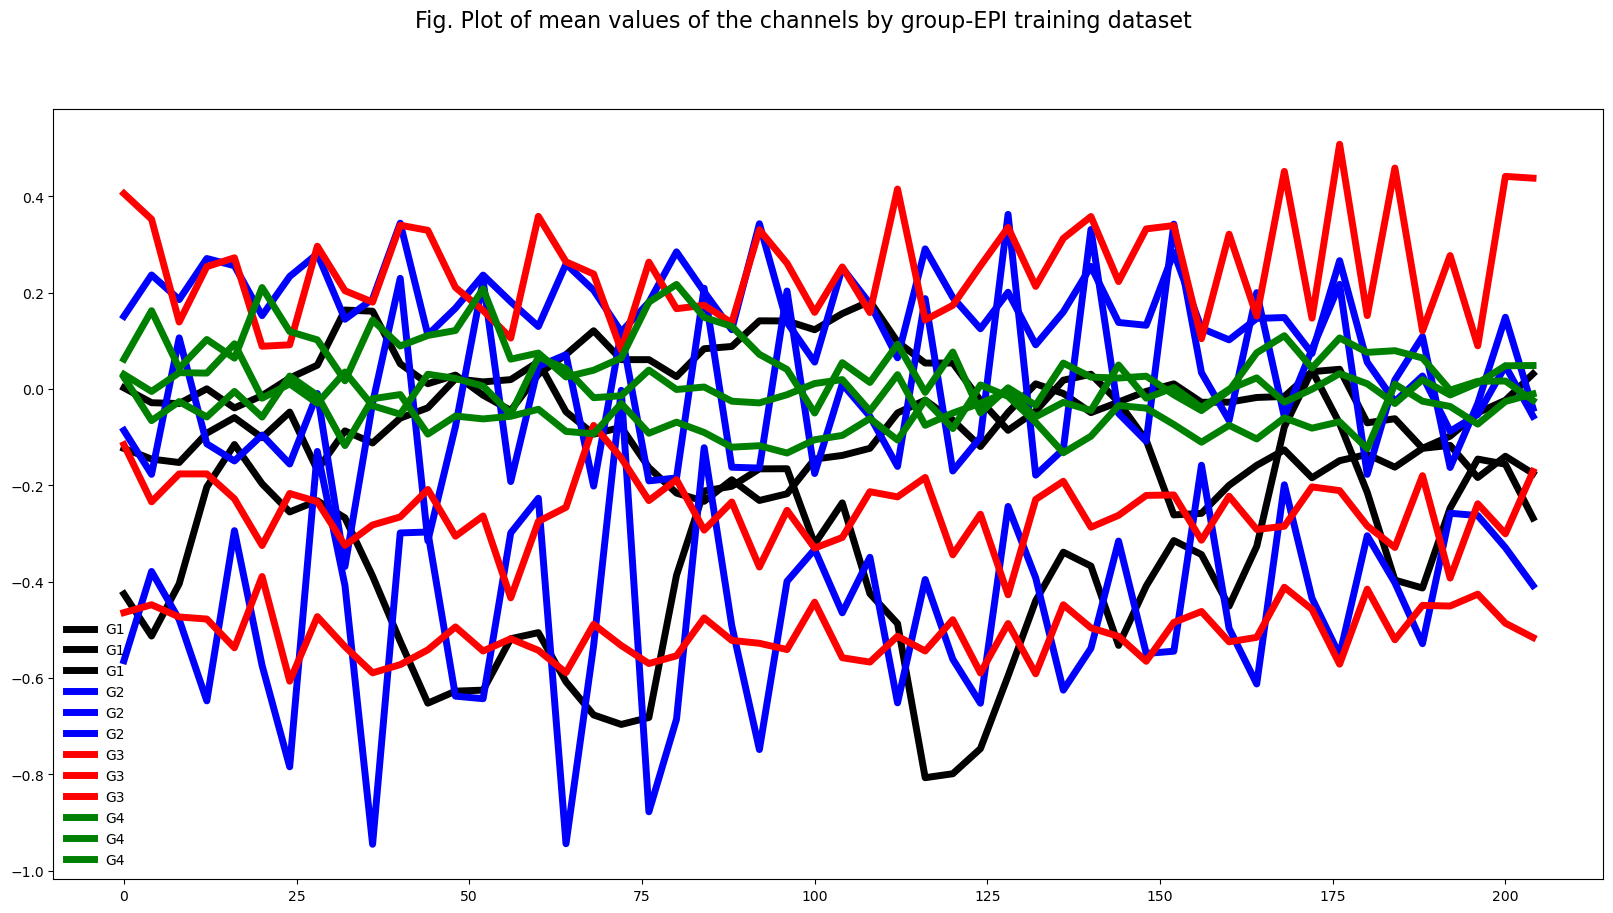

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,206,4)
fig.suptitle("Fig. Plot of mean values of the channels by group-EPI training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa2.iloc[0,ejex], color='blue',lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, Xa3.iloc[0,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[1,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[2,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa4.iloc[0,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[1,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[2,ejex], color='green', lw=5,  label='G4')
ax.legend(loc='best', frameon=False)

In [9]:
#Computing the variance of the training dataset
X.var(axis=0).sum()/(206*3)

0.7432985025918073

### Plot of  mean of all time series in each time-step by group

In [10]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(411, 206)


In [11]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()
a.shape

(4, 206)

In [12]:
tempoB.shape

(411, 207)

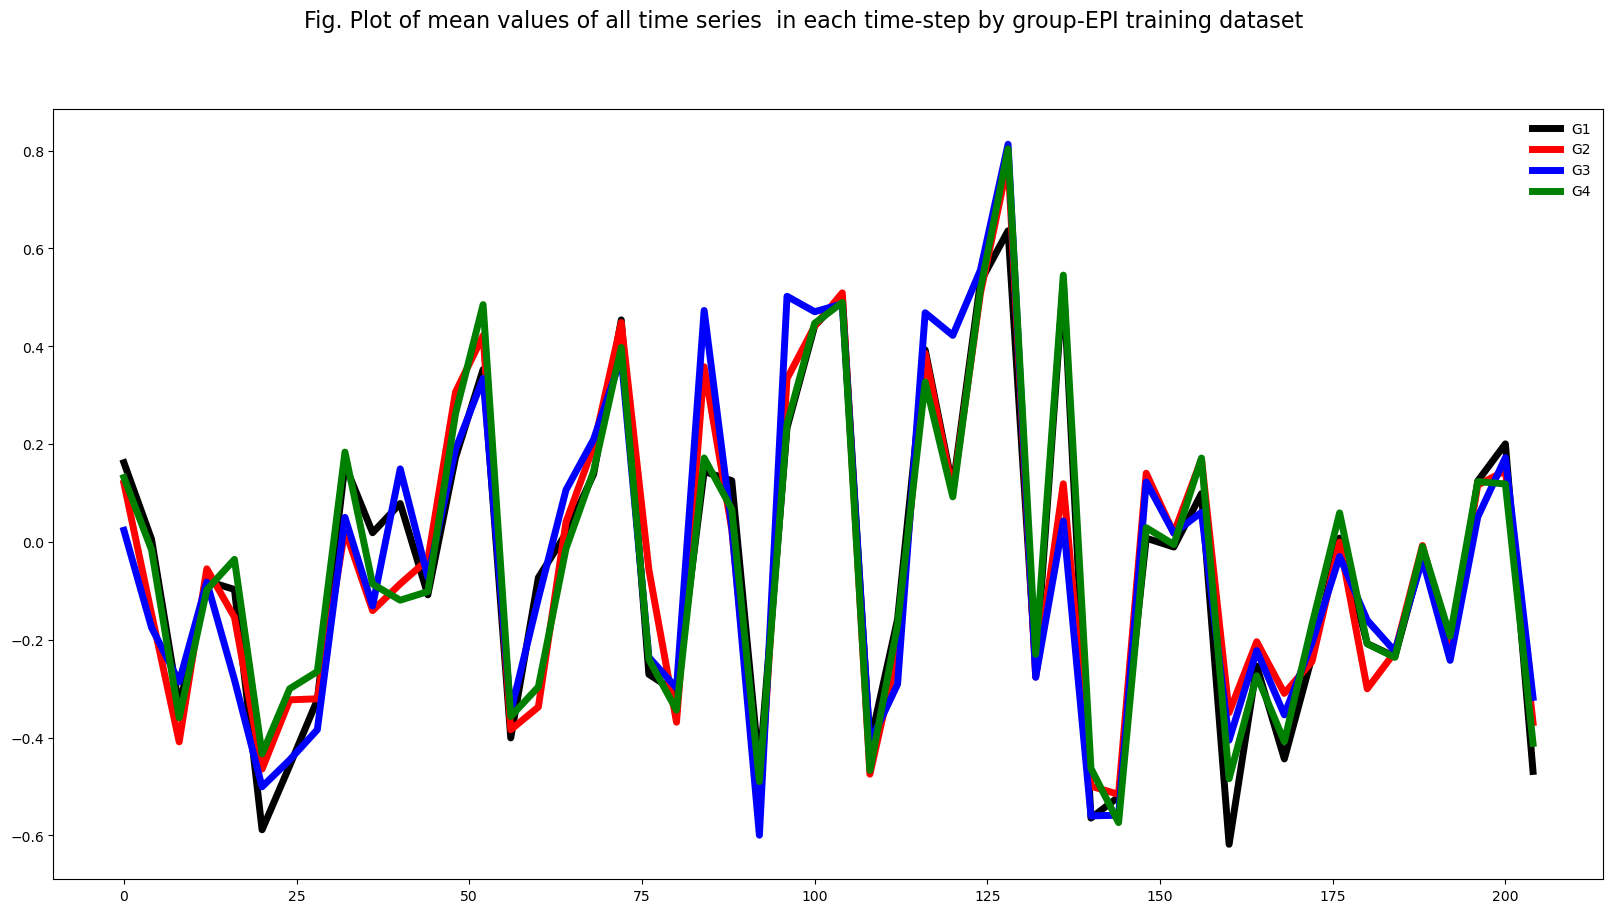

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,206,4)
fig.suptitle("Fig. Plot of mean values of all time series  in each time-step by group-EPI training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5,label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax.legend(loc='best', frameon=False)

### Distances groups training

In [14]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform
distances = pdist(means, metric='euclidean')
distances

NameError: name 'temptr' is not defined

In [ ]:
distances.max()

In [ ]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

In [ ]:
#Boxplots of dimensions in the training dataset
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

### Boxplots of dimensions in each group of the training dataset

In [ ]:
#Boxplots of dimensions in each group of the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
#temptr.boxplot(by='group')
axes = temptr.boxplot(by='group')
plt.title('')
plt.suptitle('Boxplots of cnannels by groups-Training set')
axes = plt.show()

In [ ]:
#Computing the mean of dimensions in each group of the training dataset
temptr.groupby('group').mean()

### Feature selection 

In [ ]:
#Feature selection 
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:206]
scores1 = mutual_info_classif(Xm,ym)
#scores /= scores.max()
importance1=[i for i,v in enumerate(scores1) if v > .1]
len(importance1)*100/206

In [ ]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/206

In [ ]:
Xm_new.shape

### Autocorrelation

In [ ]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
Xest = tempoB.iloc[100,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

### Testing dataset

In [ ]:
# loading Testing data
Xt, yt = load_data("Epilepsy",split="Test")

In [ ]:
#Boxplots of the dimensions  in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

In [ ]:
#Classes size test datasetmost beautiful athletes world athletics U20 Lima 2024
import numpy as np
np.sum(yt,axis=0)

In [ ]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [ ]:
#Boxplots of the dimensions in each group of the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
#tempte.boxplot(by='group')
axes = tempte.boxplot(by='group')
plt.title('')
plt.suptitle('Boxplots of cnannels by groups-Testing set')
axes = plt.show()

In [ ]:
#Computing the mean of dimensions in each group of the testing dataset
tempte.groupby('group').mean()

In [ ]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

In [ ]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#f = plt.figure(figsize=(10,3))
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
fig.suptitle('Horizontally stacked subplots')
#fig, ax = plt.subplots(figsize=(20,10))
ejex=range(0,206,10)
fig.suptitle("Fig. Plot of mean values of all time series by group-EPI trainng (above) and testing(below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, a1.iloc[2,ejex], color='blue', lw=5, label='G3')
ax2.plot(ejex, a1.iloc[3,ejex], color='green', lw=5,  label='G4')
ax2.legend(loc='best', frameon=False)

In [ ]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

In [ ]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)

In [ ]:
dst

In [ ]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
Xest = tempoB.iloc[50,0:1751]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))